### Load data

In [77]:
import sys
import os
import logging
sys.path.append(os.path.abspath('../scripts'))

from logging_config import setup_logger
from data_loader import load_data
from data_cleaning import clean_multiple_datasets
from eda import perform_eda
from visualization import plot_column

In [78]:
setup_logger(log_file="task1_pipeline.log", log_level=logging.DEBUG)

2024-11-15 21:02:17,022 - INFO - Logger initialized. Log file: logs\task1_pipeline.log


In [79]:
logging.info("Loading datasets.")
data_tsla = load_data('../data/raw/TSLA_data.csv')
data_spy = load_data('../data/raw/SPY_data.csv')
data_bnd = load_data('../data/raw/BND_data.csv')

2024-11-15 21:02:17,348 - INFO - Loading datasets.


In [80]:
datasets = {"TSLA": data_tsla, "SPY": data_spy, "BND": data_bnd}

### Clean Data

In [81]:
logging.info("Cleaning datasets.")
cleaned_datasets = clean_multiple_datasets(datasets)

2024-11-15 21:02:17,910 - INFO - Cleaning datasets.
2024-11-15 21:02:17,914 - INFO - Cleaning dataset: TSLA
2024-11-15 21:02:17,917 - INFO - Starting data cleaning.
2024-11-15 21:02:17,936 - INFO - Initial data shape: (2014, 6)
2024-11-15 21:02:17,943 - INFO - Ensured numeric type for column: Open
2024-11-15 21:02:17,946 - INFO - Ensured numeric type for column: High
2024-11-15 21:02:17,946 - INFO - Ensured numeric type for column: Low
2024-11-15 21:02:17,949 - INFO - Ensured numeric type for column: Close
2024-11-15 21:02:17,951 - INFO - Ensured numeric type for column: Adj Close
2024-11-15 21:02:17,954 - INFO - Ensured numeric type for column: Volume
2024-11-15 21:02:17,954 - INFO - Final data shape: (2014, 6)
2024-11-15 21:02:17,954 - INFO - Data cleaning completed.
2024-11-15 21:02:17,958 - INFO - Cleaning dataset: SPY
2024-11-15 21:02:17,958 - INFO - Starting data cleaning.
2024-11-15 21:02:17,958 - INFO - Initial data shape: (2014, 6)
2024-11-15 21:02:17,958 - INFO - Ensured nume

### EDA

In [82]:
for name, data in cleaned_datasets.items():
    logging.info("Performing EDA on %s.", name)
    perform_eda(data, name)

2024-11-15 21:02:29,722 - INFO - Performing EDA on TSLA.
2024-11-15 21:02:29,722 - INFO - Performing EDA for dataset: TSLA
2024-11-15 21:02:30,478 - INFO - Summary statistics:
              Open         High  ...    Adj Close        Volume
count  2014.000000  2014.000000  ...  2014.000000  2.014000e+03
mean     88.743650    90.735609  ...    88.662189  1.113914e+08
std     108.718116   111.222595  ...   108.557913  8.025481e+07
min       9.488000    10.331333  ...     9.578000  1.062000e+07
25%      16.224167    16.458333  ...    16.217167  6.335325e+07
50%      21.819667    22.206667  ...    21.881333  8.762100e+07
75%     183.808338   186.592499  ...   182.904999  1.275895e+08
max     411.470001   414.496674  ...   409.970001  9.140820e+08

[8 rows x 6 columns]
2024-11-15 21:02:31,001 - INFO - Correlation matrix:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999674  0.999516  0.999037   0.999037 -0.101789
High       0.999674  1.000000  

### Visualization

2024-11-15 21:23:45,485 - INFO - Plotting column: Close from dataset: TSLA


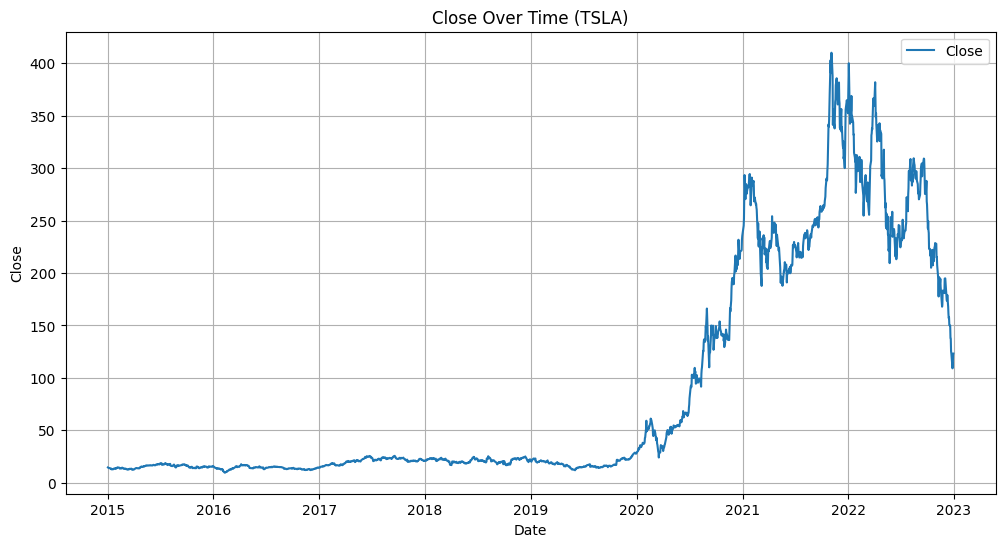

2024-11-15 21:23:45,910 - INFO - Plot for Close generated successfully.
2024-11-15 21:23:45,910 - INFO - Plotting column: Close from dataset: SPY


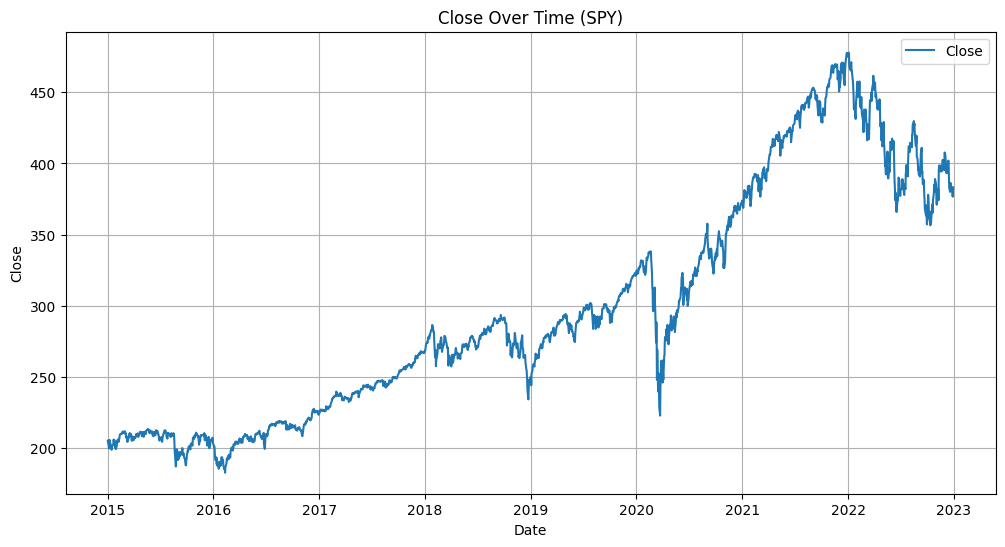

2024-11-15 21:23:46,222 - INFO - Plot for Close generated successfully.
2024-11-15 21:23:46,225 - INFO - Plotting column: Close from dataset: BND


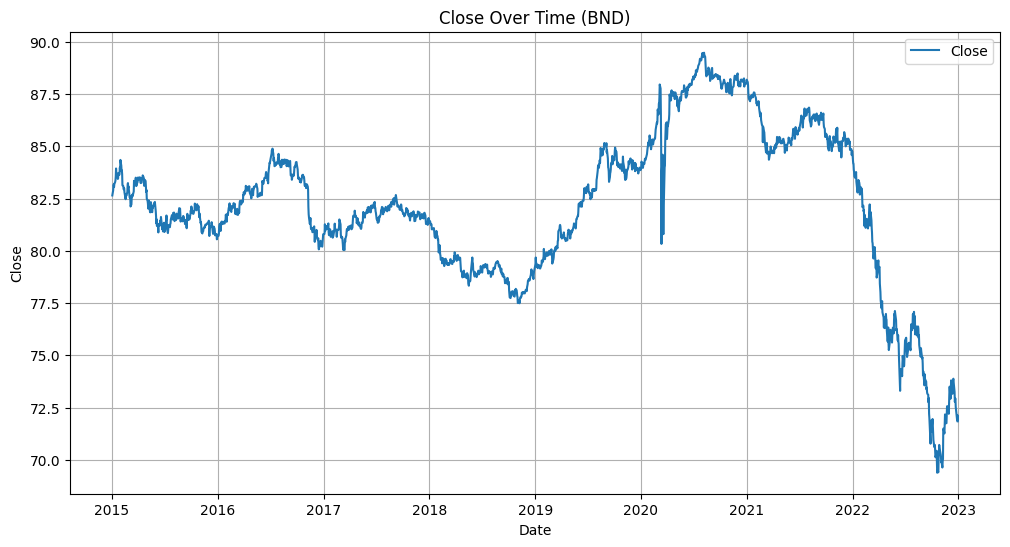

2024-11-15 21:23:46,493 - INFO - Plot for Close generated successfully.


In [84]:
for name, data in cleaned_datasets.items():
    plot_column(data, "Close", name)